In [308]:
import torchvision
import torch
from torch.utils.data import DataLoader
import numpy as np

In [309]:
baseline_model = torch.load("data/baseline_model.pt")

In [310]:
baseline_model.fc = torch.nn.Identity()
baseline_model

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [311]:
test_dataset = torch.load("data/test_baseline.pt")
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [312]:
device = "cuda"

In [313]:
from sklearn.metrics.pairwise import cosine_similarity

In [314]:
def get_feature_vectors(dataloader, model):
    
    feature_vectors = []
    labels = []
    model.eval()
    
    with torch.no_grad():
        for X, y in dataloader:
            X = X.to(device)
            y = y.to(device)
            
            
            feature_vector = model(X)
            X = X.cpu()
            feature_vector, y = feature_vector.cpu(), y.cpu()
            
            feature_vectors.extend(feature_vector)
            labels.extend(y)
    return feature_vectors, labels

In [315]:
vectors, labels = get_feature_vectors(test_dataloader, baseline_model)

In [316]:
len(vectors), len(labels)


(2620, 2620)

In [317]:
from torch.nn.functional import cosine_similarity

In [318]:
vectors

[tensor([1.4147, 1.9950, 1.4063,  ..., 0.0000, 0.2934, 3.3300]),
 tensor([1.4592, 1.2491, 1.2676,  ..., 0.0000, 0.0000, 3.9651]),
 tensor([0.3479, 1.8973, 3.2729,  ..., 2.1143, 3.8968, 0.0417]),
 tensor([0.4327, 0.4467, 2.9371,  ..., 3.8230, 1.0215, 0.0000]),
 tensor([0.7627, 3.3042, 1.4794,  ..., 3.0959, 1.7896, 0.0000]),
 tensor([1.3998, 4.3978, 3.8121,  ..., 0.0263, 1.2726, 1.7667]),
 tensor([0.0000, 1.9614, 2.5462,  ..., 1.6183, 4.8677, 1.1557]),
 tensor([0.2285, 3.3949, 4.5419,  ..., 0.1832, 4.5340, 0.0000]),
 tensor([0.3989, 2.8166, 1.8677,  ..., 0.0000, 0.3927, 1.1149]),
 tensor([0.5306, 0.9977, 0.3212,  ..., 1.5620, 0.0000, 0.0000]),
 tensor([0.9555, 3.0026, 0.4353,  ..., 2.3915, 1.7129, 2.3419]),
 tensor([0.0000, 2.1347, 0.1510,  ..., 0.0000, 0.0000, 0.0000]),
 tensor([0.0000, 1.2604, 1.3005,  ..., 3.0044, 0.0000, 2.6036]),
 tensor([1.2475, 0.1649, 3.9526,  ..., 0.1206, 0.0000, 0.4864]),
 tensor([0.0000, 2.3058, 1.8163,  ..., 0.0000, 1.4524, 1.9633]),
 tensor([0.0738, 1.2133, 

In [319]:
from sklearn.metrics.pairwise import cosine_similarity

if type(vectors[0]) == torch.Tensor: 
    for i in range(len(vectors)):
        vectors[i] = vectors[i].numpy()
        labels[i] = labels[i].numpy()

vectors = np.array(vectors)
labels = np.array(labels)

# Compute the cosine similarity matrix for all embeddings
similarity_matrix = cosine_similarity(vectors)

# Mask the diagonal (self-comparisons) by setting it to a large negative value
np.fill_diagonal(similarity_matrix, -np.inf)

# Find the index of the max similarity for each embedding (excluding self)
most_similar_indices = np.argmax(similarity_matrix, axis=1)

# Extract the labels of the most similar items
predicted_labels = [labels[i] for i in most_similar_indices]

# Calculate the number of correct predictions
n_correct = sum(1 for true_label, predicted_label in zip(labels, predicted_labels) if true_label == predicted_label)
n_total = len(labels)

acc = n_correct / len(labels)
print(acc)
    

0.25763358778625955


In [320]:
n_correct / n_total

0.25763358778625955

In [321]:
print(corrects)

[(4, 5), (5, 4), (12, 13), (15, 14), (25, 24), (26, 27), (34, 35), (35, 34), (39, 38), (41, 40), (50, 51), (51, 50), (53, 52), (58, 59), (59, 58), (69, 68), (70, 71), (73, 72), (74, 75), (75, 74), (76, 77), (77, 76), (86, 87), (87, 86), (92, 93), (93, 92), (96, 97), (97, 96), (100, 101), (106, 107), (126, 127), (127, 126), (130, 131), (131, 130), (132, 133), (133, 132), (139, 138), (140, 141), (141, 140), (142, 143), (148, 149), (149, 148), (150, 151), (151, 150), (153, 152), (154, 155), (155, 154), (156, 157), (157, 156), (162, 163), (172, 173), (173, 172), (176, 177), (180, 181), (181, 180), (183, 182), (188, 189), (189, 188), (190, 191), (191, 190), (209, 208), (214, 215), (215, 214), (221, 220), (258, 259), (259, 258), (260, 261), (264, 265), (266, 267), (267, 266), (272, 273), (273, 272), (280, 281), (281, 280), (284, 285), (285, 284), (293, 292), (294, 295), (295, 294), (304, 305), (305, 304), (314, 315), (315, 314), (327, 326), (346, 347), (347, 346), (360, 361), (361, 360), (36

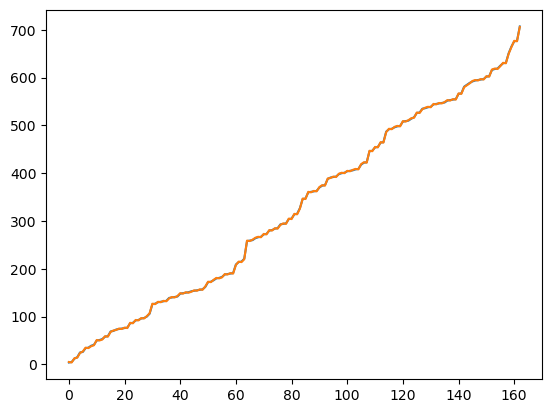

In [322]:
import matplotlib.pyplot as plt
plt.plot(corrects)

### Now same verification on the adapted model

In [323]:
model = torch.load("models/googlenet_2_210_7.pt")
model = torch.load("models/googlenet_1_1490_4.pt")

In [324]:
# train_dataset = torch.load("data/train_dataset_1.pt")
test_dataset = torch.load("data/test_dataset_1.pt")

In [325]:
# Store every anchor embedding
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True)

device = "cuda"

def get_feature_vectors_(dataloader, model):
    feature_vectors = []
    labels = []
    model.eval()
    
    with torch.no_grad():
        for triplet in dataloader:
            (anchor, pos, neg), label = triplet
            
            aX = anchor.to(device)
            pX = pos.to(device)
            nX = neg.to(device)
            
            a_y = label[0].to(device)
            p_y = label[1].to(device)
            n_y = label[2].to(device)
                        
            a_feature_vector = model(aX)
            p_feature_vector = model(pX)
            n_feature_vector = model(nX)
            
            a_feature_vector, a_y = a_feature_vector.cpu(), a_y.cpu()
            p_feature_vector, p_y = p_feature_vector.cpu(), p_y.cpu()
            n_feature_vector, n_y = n_feature_vector.cpu(), n_y.cpu()
            
            feature_vectors.extend(a_feature_vector)
            feature_vectors.extend(p_feature_vector)
            feature_vectors.extend(n_feature_vector)
            labels.extend(a_y)
            labels.extend(p_y)
            labels.extend(n_y)
    return feature_vectors, labels

In [326]:
vectors_, labels_ = get_feature_vectors_(test_dataloader, model)

labels_ = list(map(lambda x: x.item(), labels_))

In [327]:
print(vectors_[1]   )

tensor([0.0333, 0.0000, 0.0000,  ..., 0.2714, 0.0000, 0.0781])


In [328]:
from sklearn.metrics.pairwise import cosine_similarity

if type(vectors[0]) == torch.Tensor: 
    for i in range(len(vectors)):
        vectors[i] = vectors[i].numpy()
        labels[i] = labels[i].numpy()

vectors = np.array(vectors)
labels = np.array(labels)

# Compute the cosine similarity matrix for all embeddings
similarity_matrix = cosine_similarity(vectors)

# Mask the diagonal (self-comparisons) by setting it to a large negative value
np.fill_diagonal(similarity_matrix, -np.inf)

# Find the index of the max similarity for each embedding (excluding self)
most_similar_indices = np.argmax(similarity_matrix, axis=1)

# Extract the labels of the most similar items
predicted_labels = [labels[i] for i in most_similar_indices]

# Calculate the number of correct predictions
n_correct = sum(1 for true_label, predicted_label in zip(labels, predicted_labels) if true_label == predicted_label)
n_total = len(labels)

acc = n_correct / len(labels)
print(acc)
    

0.25763358778625955


In [329]:
from sklearn.metrics.pairwise import cosine_similarity

if type(vectors_[0]) == torch.Tensor:
    try:
        for i in range(len(vectors_)):
            vectors_[i] = vectors_[i].numpy()
            labels_[i] = labels_[i].numpy()
    except:
        pass
vectors_ = np.array(vectors_)
labels_ = np.array(labels_)
vectors_ = np.array([np.array(vec) for vec in vectors_])


# Compute the cosine similarity matrix for all embeddings
similarity_matrix = cosine_similarity(vectors_)

# Mask the diagonal (self-comparisons) by setting it to a large negative value
np.fill_diagonal(similarity_matrix, -np.inf)

# Find the index of the max similarity for each embedding (excluding self)
most_similar_indices = np.argmax(similarity_matrix, axis=1)

# Extract the labels of the most similar items
predicted_labels = [labels_[i] for i in most_similar_indices]

# Calculate the number of correct predictions
n_correct = sum(1 for true_label, predicted_label in zip(labels, predicted_labels) if true_label == predicted_label)

acc = n_correct / len(labels)
print(acc)
    

0.0007633587786259542


C:\Users\sebas\AppData\Local\Temp\ipykernel_6968\1206646926.py:10: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  vectors_ = np.array(vectors_)
C:\Users\sebas\AppData\Local\Temp\ipykernel_6968\1206646926.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  vectors_ = np.array(vectors_)


In [330]:
n_correct

2